In [1]:
# Steven Gonzales
import sys # modules in sys.path directories's are all available for import
sys.path.append('./DevelopedMethods')
from preprocessing import * # import our pre-processed dataset + imports.py (np, pd, df, df_train, X_train_balanced etc.)

In [9]:
# Train Isolation Forest
ccfd_iso_forest = IsolationForest(
    n_estimators=100,
    contamination='auto',  # Automatically estimate contamination (fraud rate)
    random_state=42
)
ccfd_iso_forest.fit(X_train_balanced)

# Predict Outliers
cached_X_train_balanced = X_train_balanced.copy() # cannot add column directly to X_train_balanced AND also run ccfd_iso_forest.predict on itself
cached_X_train_balanced['anomaly_score'] = ccfd_iso_forest.decision_function(X_train_balanced)  # Higher scores = normal
cached_X_train_balanced['is_anomaly'] = ccfd_iso_forest.predict(X_train_balanced)  # -1 = anomaly, 1 = normal

# Map Isolation Forest anomalies to Fraud label
cached_X_train_balanced['predicted_fraud'] = cached_X_train_balanced['is_anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Evaluate Performance
print(metrics.classification_report(y_train_balanced, cached_X_train_balanced['predicted_fraud'])) # mutliple metrics: precision, recall, and F1-score

              precision    recall  f1-score   support

           0       0.83      1.00      0.91   1289169
           1       1.00      0.00      0.00    257833

    accuracy                           0.83   1547002
   macro avg       0.92      0.50      0.45   1547002
weighted avg       0.86      0.83      0.76   1547002



# ROC / AUC

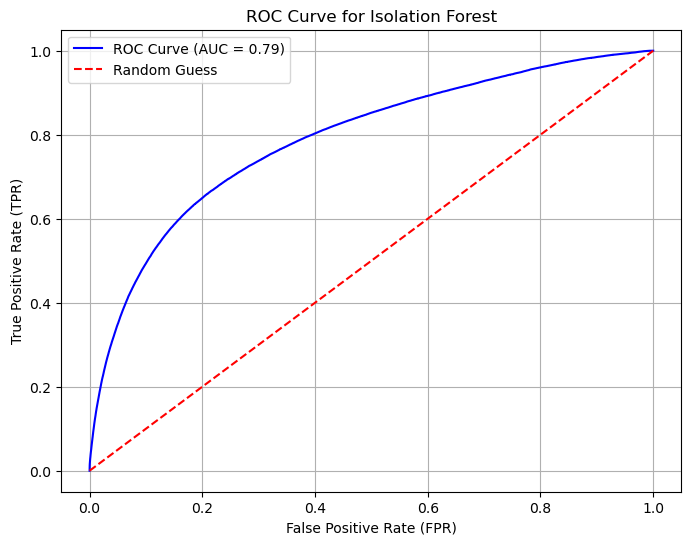

ROC-AUC Score: 0.79


In [20]:
# Calculate ROC curve
if_fpr, if_tpr, if_thresholds = metrics.roc_curve(y_train_balanced, -cached_X_train_balanced['anomaly_score'])  # Negative scores for alignment with anomaly detection
if_roc_auc = metrics.auc(if_fpr, if_tpr)  # Calculate AUC

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {if_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for Isolation Forest')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()

# Print AUC Score
print(f"ROC-AUC Score: {if_roc_auc:.2f}")
